In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

y_train_ohe = to_categorical(y_train, 10).astype('float32')
y_test_ohe = to_categorical(y_test, 10).astype('float32')


#  Define Parameters

In [6]:
input_size = 784
hidden_size = 128
output_size = 10
learning_rate = 0.01
epochs = 10
batch_size = 64

# Initialize Weights and Biases

In [7]:
W1 = tf.Variable(tf.random.normal([input_size, hidden_size],dtype=tf.float32, stddev=0.1))
b1 = tf.Variable(tf.zeros([hidden_size],dtype=tf.float32))

W2 = tf.Variable(tf.random.normal([hidden_size, output_size],dtype=tf.float32, stddev=0.1))
b2 = tf.Variable(tf.zeros([output_size],dtype=tf.float32))

 # Training Loop

In [8]:
loss_history = []

for epoch in range(epochs):
    for i in range(0, len(x_train), batch_size):
        x_batch = x_train[i:i+batch_size]
        y_batch = y_train_ohe[i:i+batch_size]

        with tf.GradientTape() as tape:
            z1 = tf.matmul(x_batch, W1) + b1
            a1 = tf.nn.relu(z1)

            z2 = tf.matmul(a1, W2) + b2
            y_pred = tf.nn.softmax(z2)

            loss = tf.reduce_mean(tf.keras.losses.categorical_crossentropy(y_batch, y_pred))

        grads = tape.gradient(loss, [W1, b1, W2, b2])

        W1.assign_sub(learning_rate * grads[0])
        b1.assign_sub(learning_rate * grads[1])
        W2.assign_sub(learning_rate * grads[2])
        b2.assign_sub(learning_rate * grads[3])

    loss_history.append(loss.numpy())
    print(f"Epoch {epoch+1}, Loss: {loss.numpy():.4f}")


Epoch 1, Loss: 0.3605
Epoch 2, Loss: 0.2337
Epoch 3, Loss: 0.1901
Epoch 4, Loss: 0.1638
Epoch 5, Loss: 0.1438
Epoch 6, Loss: 0.1277
Epoch 7, Loss: 0.1140
Epoch 8, Loss: 0.1022
Epoch 9, Loss: 0.0927
Epoch 10, Loss: 0.0848


# Visualize Loss

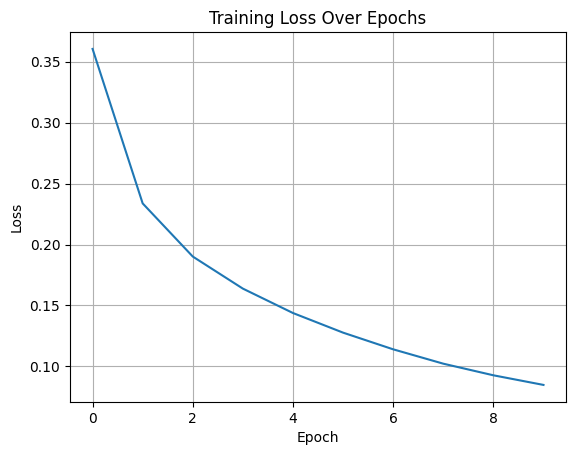

In [9]:
plt.plot(loss_history)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()

# Evaluate the Model

In [10]:
z1 = tf.matmul(x_test, W1) + b1
a1 = tf.nn.relu(z1)
z2 = tf.matmul(a1, W2) + b2
y_pred = tf.nn.softmax(z2)

correct_preds = tf.equal(tf.argmax(y_pred, axis=1), tf.argmax(y_test_ohe, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_preds, tf.float32))

print(f"Test Accuracy: {accuracy.numpy() * 100:.2f}%")


Test Accuracy: 93.12%
